In [38]:
from env import host, user, password
import env
from pydataset import data
import matplotlib as plt
import pandas as pd
import numpy as np
import math
%matplotlib inline

In [39]:
mpg = data('mpg')

In [40]:
data()

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
...,...,...
752,VerbAgg,Verbal Aggression item responses
753,cake,Breakage Angle of Chocolate Cakes
754,cbpp,Contagious bovine pleuropneumonia
755,grouseticks,Data on red grouse ticks from Elston et al. 2001


In [41]:
mpg.groupby('manufacturer')['cty','hwy'].mean().sort_values(by='hwy')

,cty,hwy
manufacturer,,
land rover,11.500000,16.500000
lincoln,11.333333,17.000000
jeep,13.500000,17.625000
dodge,13.135135,17.945946
mercury,13.250000,18.000000
ford,14.000000,19.360000
chevrolet,15.000000,21.894737
nissan,18.076923,24.615385
toyota,18.529412,24.911765


In [42]:
mpg['trans_type'] = mpg.trans.str[:-4]

In [43]:
mpg.groupby('trans_type')['cty','hwy'].mean()

,cty,hwy
trans_type,,
auto,15.968153,22.292994
manual,18.675325,25.779221


In [44]:
users = pd.DataFrame({
'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [45]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [46]:
def get_db_url(dbname) -> str:
    url = 'mysql+pymysql://{}:{}@{}/{}'
    return url.format(env.user, env.password, env.host,dbname)

In [47]:
employees_url = get_db_url('employees')

In [48]:
query = '''
SELECT *
FROM employees
LIMIT 20
'''

pd.read_sql(query, employees_url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
5,10006,1953-04-20,Anneke,Preusig,F,1989-06-02
6,10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10
7,10008,1958-02-19,Saniya,Kalloufi,M,1994-09-15
8,10009,1952-04-19,Sumant,Peac,F,1985-02-18
9,10010,1963-06-01,Duangkaew,Piveteau,F,1989-08-24


In [49]:
query = '''
SELECt * FROM employees
'''

employees = pd.read_sql(query, employees_url)

In [50]:
query = '''
SELECT * FROM titles
'''
titles = pd.read_sql(query, employees_url)

In [51]:
titles[titles.to_date == titles.to_date.max()]

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
5,10005,Senior Staff,1996-09-12,9999-01-01
...,...,...,...,...
443300,499995,Engineer,1997-06-02,9999-01-01
443302,499996,Senior Engineer,2002-05-13,9999-01-01
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01


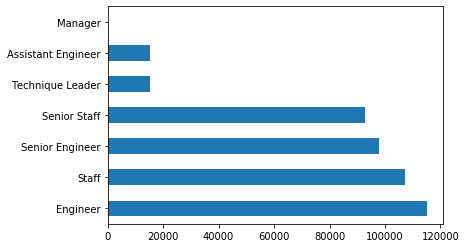

In [52]:
titles.title.value_counts().plot.barh()

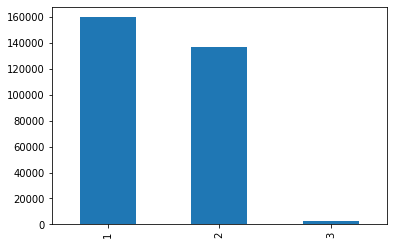

In [54]:
titles.groupby('emp_no').title.count().value_counts().plot.bar()

In [56]:
title_counts = titles.groupby('emp_no').title.count()